In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_validate,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_curve # 绘制ROC曲线
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
train

,policy_id,age,customer_months,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud
0,122576,37,189,2013-08-21,C,500/1000,1000,1465.71,5000000,455456,...,3,?,54930,6029,5752,44452,Nissan,Maxima,2000,0
1,937713,44,234,1998-01-04,B,250/500,500,821.24,0,591805,...,1,YES,50680,5376,10156,37347,Honda,Civic,1996,0
2,680237,33,23,1996-02-06,B,500/1000,1000,1844.00,0,442490,...,1,NO,47829,4460,9247,33644,Jeep,Wrangler,2002,0
3,513080,42,210,2008-11-14,A,500/1000,500,1867.29,0,439408,...,2,YES,68862,11043,5955,53548,Suburu,Legacy,2003,1
4,192875,29,81,2002-01-08,A,100/300,1000,816.25,0,640575,...,1,YES,59726,5617,10301,41550,Ford,F150,2004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1008425,37,196,1997-06-29,C,250/500,500,1301.20,0,474615,...,3,NO,61433,10436,11432,39745,Nissan,Pathfinder,2011,1
696,770702,43,229,2001-05-29,A,250/500,500,1434.94,8000000,444476,...,1,?,68623,6798,14557,50606,Volkswagen,Passat,2013,1
697,755099,35,209,2003-01-11,C,100/300,500,1639.46,0,639608,...,0,YES,58033,9129,4598,40740,Mercedes,C300,2002,0
698,693804,44,275,2003-07-22,B,500/1000,2000,1042.29,0,432061,...,0,NO,35253,7359,3464,24677,Audi,A3,2007,1


In [4]:
test = pd.read_csv("test.csv")
test

,policy_id,age,customer_months,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,681822,60,473,2002-12-17,B,500/1000,1000,1134.96,0,445975,...,0,3,?,53253,5212,10251,39503,Saab,95,2006
1,301288,36,173,1994-01-15,B,100/300,1000,916.20,0,469238,...,0,0,NO,69401,8309,8439,50012,Mercedes,ML350,2008
2,212001,36,147,1995-12-19,B,500/1000,1000,1175.74,5000000,595953,...,2,0,NO,63919,5572,11477,42801,Dodge,Neon,2009
3,797680,24,71,1992-06-20,C,500/1000,500,1472.40,0,613103,...,0,0,NO,63173,12027,6500,43423,Dodge,RAM,2012
4,789334,39,230,1996-11-28,C,250/500,1000,1159.44,4000000,581581,...,0,0,?,8847,904,1786,6138,Accura,RSX,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,663065,36,30,1999-08-18,B,500/1000,2000,1384.15,9000000,593323,...,0,1,YES,4507,970,477,3339,Dodge,Neon,2002
296,283767,47,285,2009-12-23,C,250/500,500,1590.78,7000000,447235,...,0,3,YES,45909,5599,5627,34598,Jeep,Grand Cherokee,1999
297,325099,39,256,1999-04-08,C,500/1000,2000,1265.24,0,592069,...,0,0,?,42293,5773,5491,34805,Dodge,RAM,1997
298,465673,35,54,2010-09-08,C,100/300,500,1229.74,0,451451,...,2,0,?,76875,14955,7312,59418,Nissan,Maxima,2012


In [5]:
train.describe()

,policy_id,age,customer_months,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud
count,7.000000e+02,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,5.496250e+05,38.651429,205.298571,1147.857143,1246.554071,1.100000e+06,502796.822857,25841.777143,-26246.988571,11.642857,1.870000,0.994286,1.477143,52423.045714,7449.782857,7331.532857,37688.162857,2004.931429,0.258571
std,2.590680e+05,9.210536,116.088397,611.579706,251.203263,2.282922e+06,74251.316608,28107.516454,28465.355105,6.964524,1.035265,0.818227,1.113472,26179.082222,4888.803365,4787.151705,18724.432173,5.983371,0.438163
min,9.677100e+04,19.000000,0.000000,500.000000,411.660000,-1.000000e+06,412997.000000,0.000000,-109100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,3.431578e+05,31.000000,114.000000,500.000000,1075.515000,0.000000e+00,449293.500000,0.000000,-51785.000000,5.000000,1.000000,0.000000,0.000000,41618.750000,4282.500000,4471.000000,30332.500000,2000.000000,0.000000
50%,5.423600e+05,38.000000,202.000000,1000.000000,1256.730000,0.000000e+00,468492.000000,11787.000000,-15587.000000,12.000000,1.000000,1.000000,1.000000,57982.000000,6805.000000,6698.500000,41869.000000,2005.000000,0.000000
75%,7.609460e+05,44.000000,279.000000,2000.000000,1416.410000,0.000000e+00,590343.000000,51144.500000,0.000000,17.000000,3.000000,2.000000,2.000000,69996.500000,11301.750000,10750.500000,50450.500000,2010.000000,1.000000
max,1.045409e+06,63.000000,498.000000,2000.000000,2004.590000,1.000000e+07,649422.000000,98289.000000,0.000000,23.000000,4.000000,2.000000,3.000000,120666.000000,21652.000000,23812.000000,78446.000000,2015.000000,1.000000


In [6]:
financial_data = train

numerical_features = list(financial_data.select_dtypes(exclude=["object"]).columns)
object_features = list(financial_data.select_dtypes(include=["object"]).columns)
numerical_features, object_features

(['policy_id',
  'age',
  'customer_months',
  'policy_deductable',
  'policy_annual_premium',
  'umbrella_limit',
  'insured_zip',
  'capital-gains',
  'capital-loss',
  'incident_hour_of_the_day',
  'number_of_vehicles_involved',
  'bodily_injuries',
  'witnesses',
  'total_claim_amount',
  'injury_claim',
  'property_claim',
  'vehicle_claim',
  'auto_year',
  'fraud'],
 ['policy_bind_date',
  'policy_state',
  'policy_csl',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model'])

In [7]:
serial_features = []
discrete_features = []
unique_features = []

for feature in numerical_features:
    temp = financial_data[feature].nunique()
    if temp == 1:
        unique_features.append(feature)
    elif temp > 1 and temp < 10:
        discrete_features.append(feature)
    else:
        serial_features.append(feature)

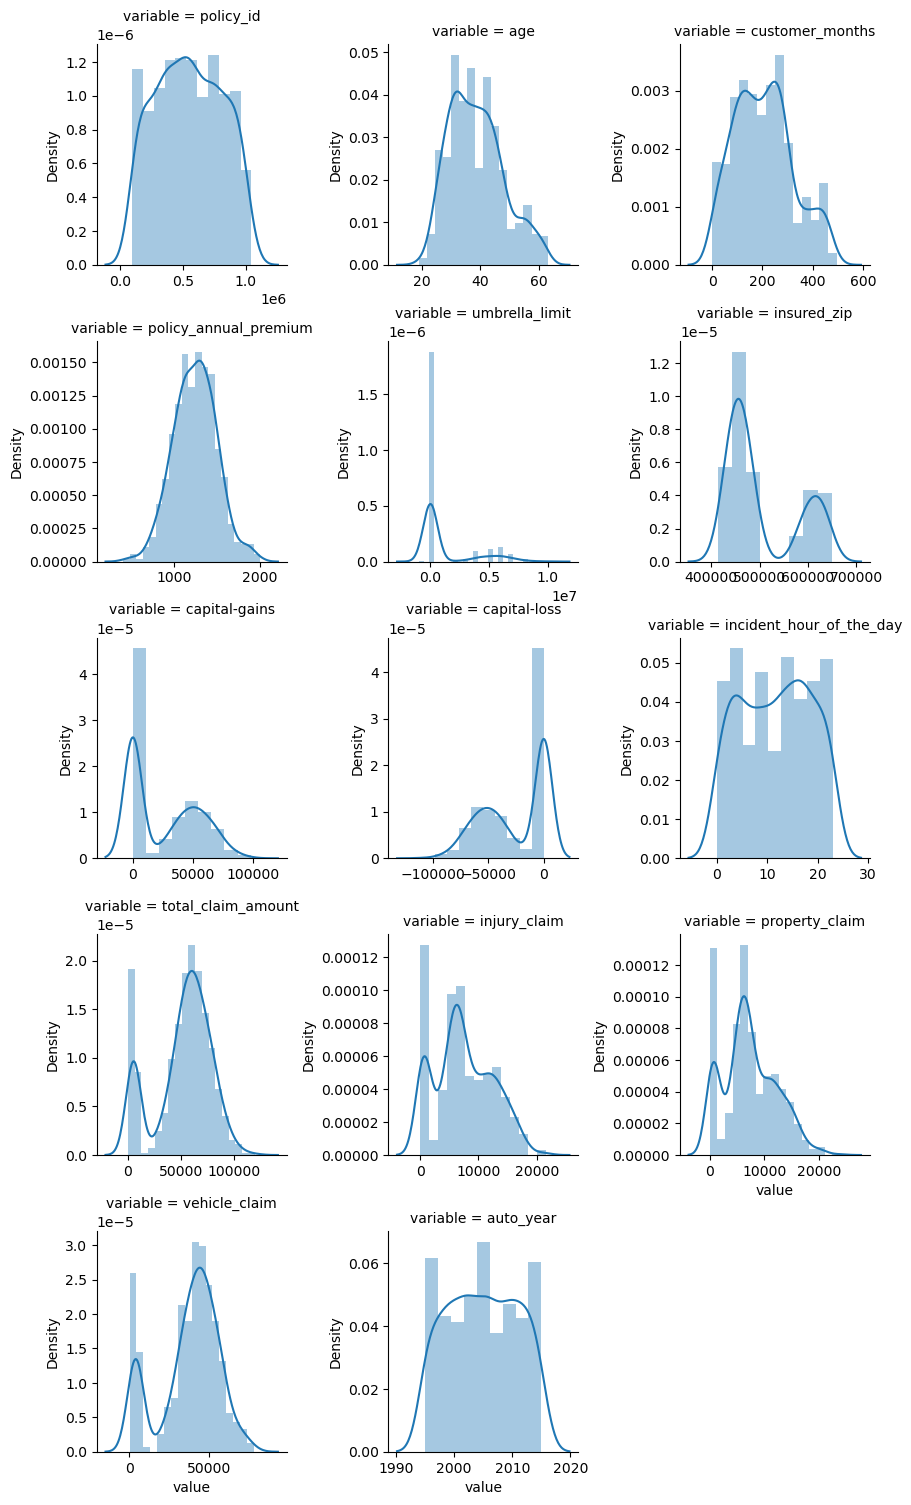

In [8]:
# serial features
serial_df = pd.melt(financial_data, value_vars=serial_features)
f = sns.FacetGrid(serial_df, col="variable", col_wrap=3, sharex=False, sharey=False)
f.map(sns.distplot, "value")

Text(0, 0.5, 'Density')

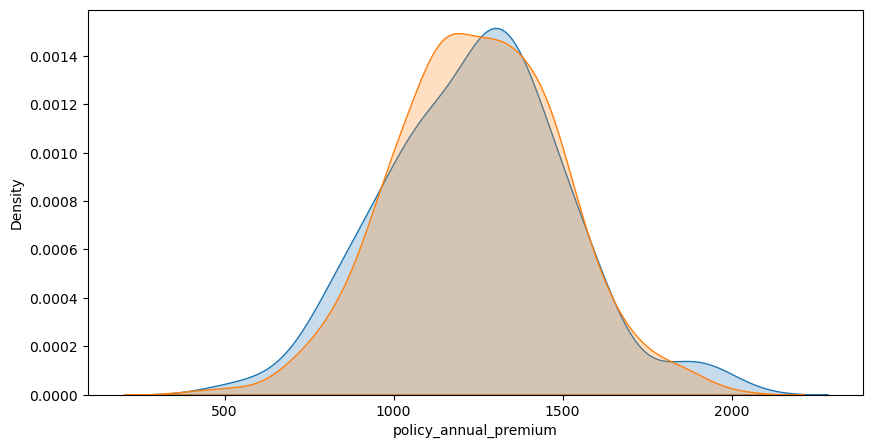

In [9]:
plt.figure(figsize=(10, 5))
sns.kdeplot(financial_data.policy_annual_premium[financial_data["fraud"] == 1], shade=True)
sns.kdeplot(financial_data.policy_annual_premium[financial_data["fraud"] == 0], shade=True)
plt.xlabel("policy_annual_premium")
plt.ylabel("Density")

<AxesSubplot: xlabel='capital-loss', ylabel='Density'>

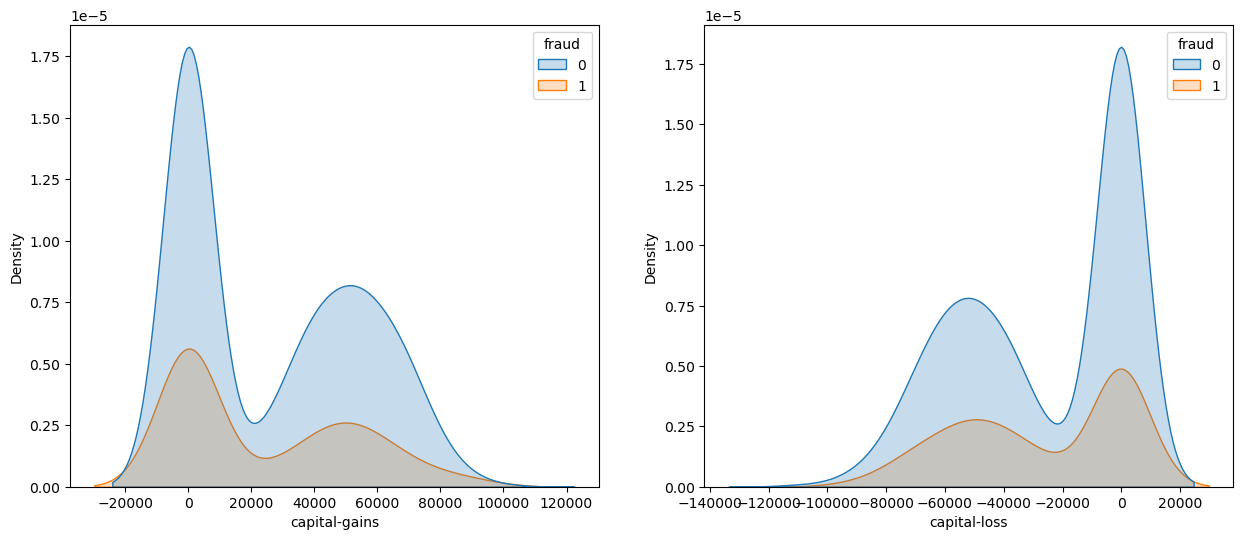

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.kdeplot(financial_data, x="capital-gains", hue="fraud", shade=True, ax=axes[0])
sns.kdeplot(financial_data, x="capital-loss", hue="fraud", shade=True, ax=axes[1])

Text(0, 0.5, 'Density')

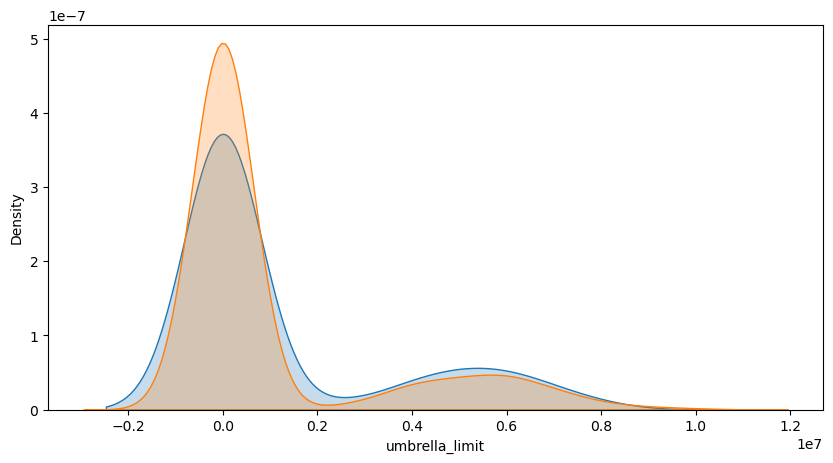

In [11]:
plt.figure(figsize=(10, 5))
sns.kdeplot(financial_data.umbrella_limit[financial_data["fraud"] == 1], shade=True)
sns.kdeplot(financial_data.umbrella_limit[financial_data["fraud"] == 0], shade=True)
plt.xlabel("umbrella_limit")
plt.ylabel("Density")

In [12]:
# Discrete feature
for feature in discrete_features:
    temp = financial_data[feature].nunique()
    print(feature, "- Number of Class Types:", temp)

policy_deductable - Number of Class Types: 3
number_of_vehicles_involved - Number of Class Types: 4
bodily_injuries - Number of Class Types: 3
witnesses - Number of Class Types: 4
fraud - Number of Class Types: 2


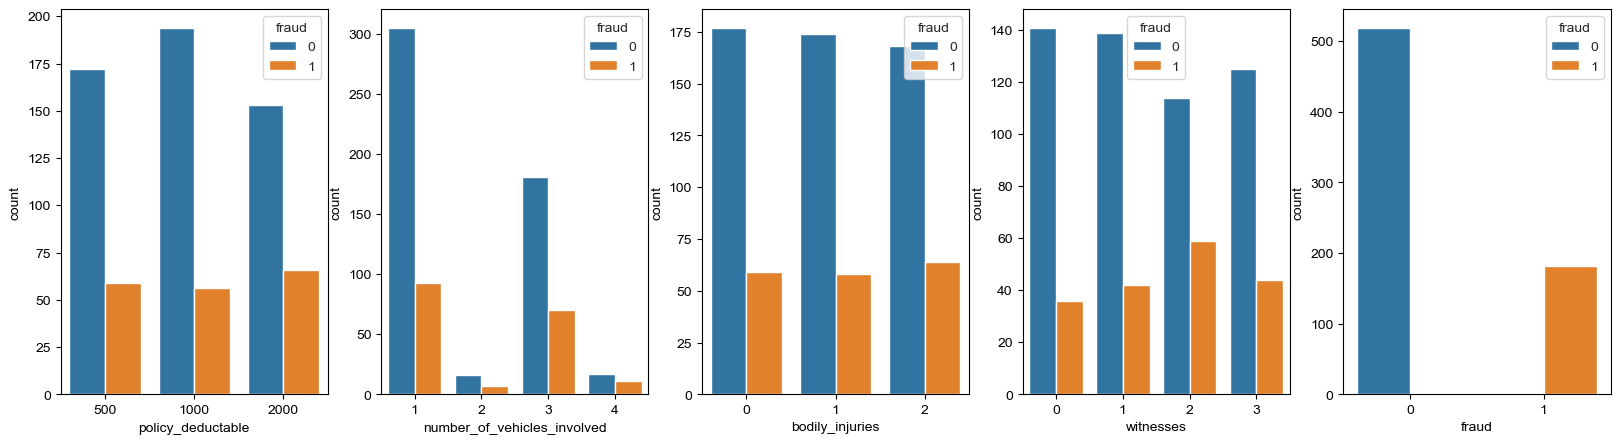

In [13]:
discrete_df = financial_data[discrete_features]
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
sns.set_style("whitegrid")
for i, feature in enumerate(discrete_features):
    sns.countplot(data=discrete_df, x=feature, hue="fraud", ax=axes[i])

In [14]:
# categorical features
financial_data[object_features]

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,2013-08-21,C,500/1000,FEMALE,Masters,protective-serv,reading,not-in-family,2014-12-22,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,S5,Riverwood,?,?,Nissan,Maxima
1,1998-01-04,B,250/500,MALE,JD,craft-repair,polo,other-relative,2015-02-18,Multi-vehicle Collision,Side Collision,Minor Damage,Other,S5,Springfield,?,YES,Honda,Civic
2,1996-02-06,B,500/1000,FEMALE,High School,machine-op-inspct,skydiving,wife,2015-01-18,Single Vehicle Collision,Side Collision,Total Loss,Police,S3,Northbend,?,NO,Jeep,Wrangler
3,2008-11-14,A,500/1000,MALE,JD,transport-moving,video-games,own-child,2015-02-02,Multi-vehicle Collision,Front Collision,Major Damage,Fire,S3,Northbend,YES,YES,Suburu,Legacy
4,2002-01-08,A,100/300,FEMALE,MD,craft-repair,video-games,own-child,2015-02-09,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,S2,Northbend,YES,YES,Ford,F150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1997-06-29,C,250/500,MALE,JD,tech-support,video-games,wife,2015-01-18,Single Vehicle Collision,Front Collision,Major Damage,Ambulance,S5,Columbus,?,NO,Nissan,Pathfinder
696,2001-05-29,A,250/500,MALE,College,machine-op-inspct,golf,husband,2015-01-13,Multi-vehicle Collision,Rear Collision,Major Damage,Ambulance,S1,Arlington,NO,?,Volkswagen,Passat
697,2003-01-11,C,100/300,FEMALE,College,transport-moving,golf,not-in-family,2015-03-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,S2,Riverwood,NO,YES,Mercedes,C300
698,2003-07-22,B,500/1000,FEMALE,Associate,machine-op-inspct,paintball,other-relative,2015-01-09,Multi-vehicle Collision,Rear Collision,Major Damage,Ambulance,S5,Northbend,?,NO,Audi,A3


In [15]:
financial_data[object_features].isna().any(axis=0)

policy_bind_date           False
policy_state               False
policy_csl                 False
insured_sex                False
insured_education_level    False
insured_occupation         False
insured_hobbies            False
insured_relationship       False
incident_date              False
incident_type              False
collision_type             False
incident_severity          False
authorities_contacted      False
incident_state             False
incident_city              False
property_damage            False
police_report_available    False
auto_make                  False
auto_model                 False
dtype: bool

In [16]:
categorical_df = pd.concat([financial_data[object_features], financial_data[discrete_features[-1]]], axis=1)
n = len(object_features) // 6

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'policy_id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'customer_months'),
  Text(3, 0, 'policy_bind_date'),
  Text(4, 0, 'policy_state'),
  Text(5, 0, 'policy_csl'),
  Text(6, 0, 'policy_deductable'),
  Text(7, 0, 'policy_annual_premium'),
  Text(8, 0, 'umbrella_limit'),
  Text(9, 0, 'insured_zip'),
  Text(10, 0, 'insured_sex'),
  Text(11, 0, 'insured_education_level'),
  Text(12, 0, 'insured_occupation'),
  Text(13, 0, 'insured_hobbies'),
  Text(14, 0, 'insured_relationship'),
  Text(15, 0, 'capital-gains'),
  Text(16, 0, 'capital-loss'),
  Text(17, 0, 'incident_date'),
  Text(18, 0, 'incident_type'),
  Text(19, 0, 'collision_type'),
  Text(20, 0, 'incident_severity'),
  Text(21, 0, 'authorities_contacted'),
  Text(22, 0, 'incident_state'),
  Text(23, 0, 'incident_city'),
  Text(24, 0, 'incident_hour_of_the

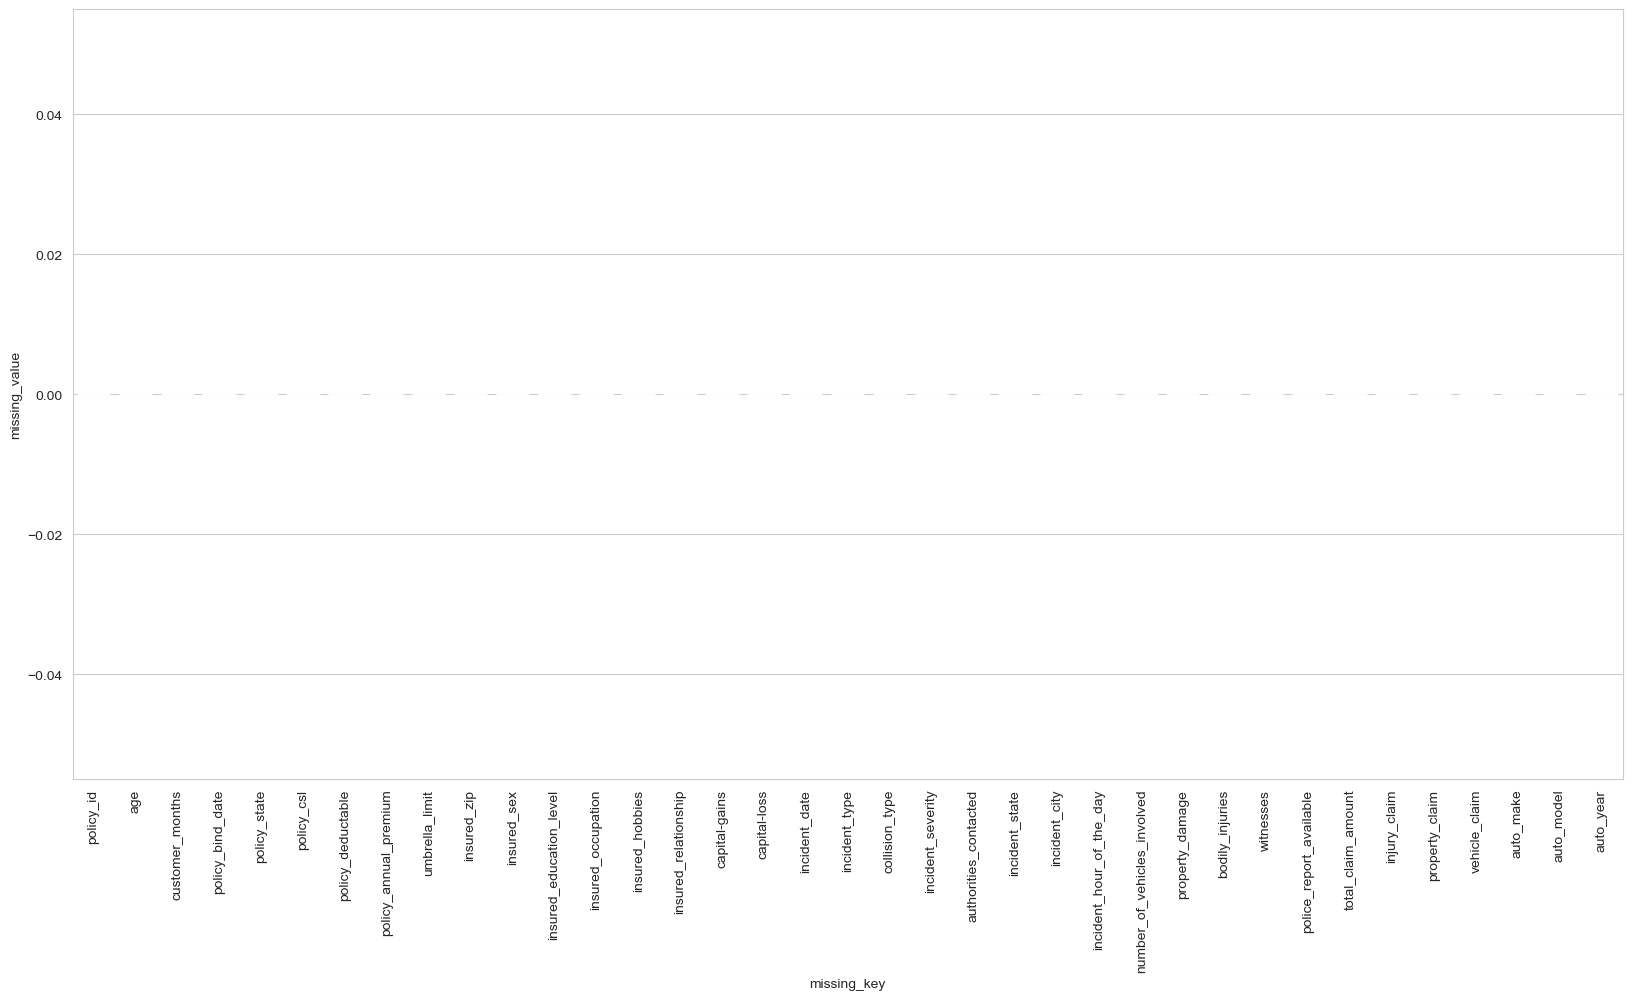

In [17]:
# Impute Missing Value
X_missing = financial_data.drop(columns="fraud")
missing = X_missing.isna().mean()
missing_df = pd.DataFrame({"missing_key": missing.keys(), "missing_value": np.round(missing.values, 4)})
plt.figure(figsize=(20, 10))
sns.barplot(data=missing_df, x="missing_key", y="missing_value")
plt.xticks(rotation=90)
# 缺失值都不超过50%，所以我们进行填充缺失值

<AxesSubplot: >

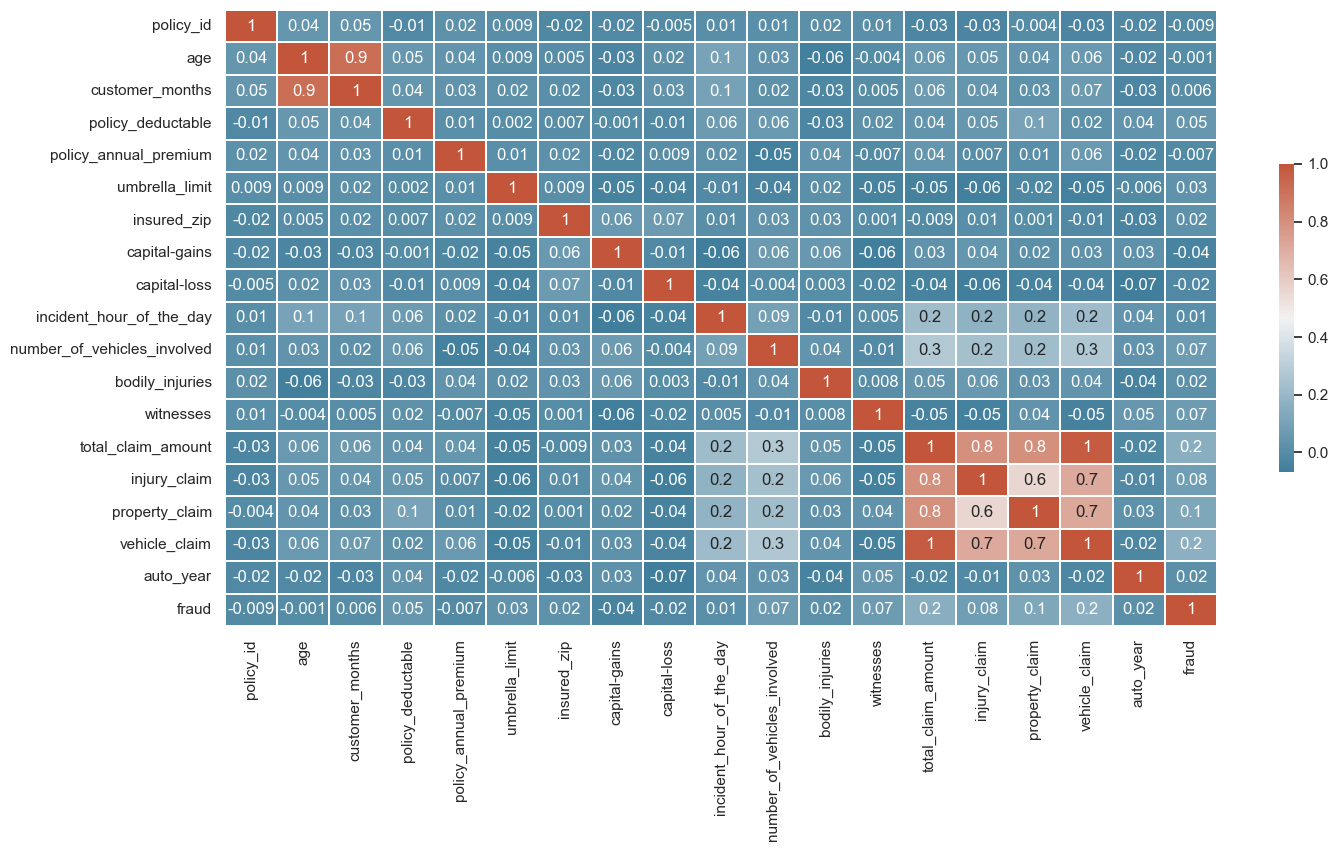

In [18]:
# correlation
cor = financial_data[numerical_features].corr()
sns.set_theme(style="white")
plt.figure(figsize=(16, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor, cmap=cmap, annot=True, linewidths=0.2, cbar_kws={"shrink": .5}, linecolor="white", fmt=".1g")

In [19]:
# Feature Engineering
# Remove the label column
label = "fraud"
numerical_features.remove(label)

In [20]:
# Impute missing value with mode
missing_feature = list(missing_df[missing_df['missing_value'] != 0].missing_key) # 有缺失值的特征
financial_data[missing_feature] # 可以看出来都是分类型变量
for val in missing_feature:
    train[val] = train[val].fillna(train[val].mode()[0])
    test[val] = test[val].fillna(test[val].mode()[0])

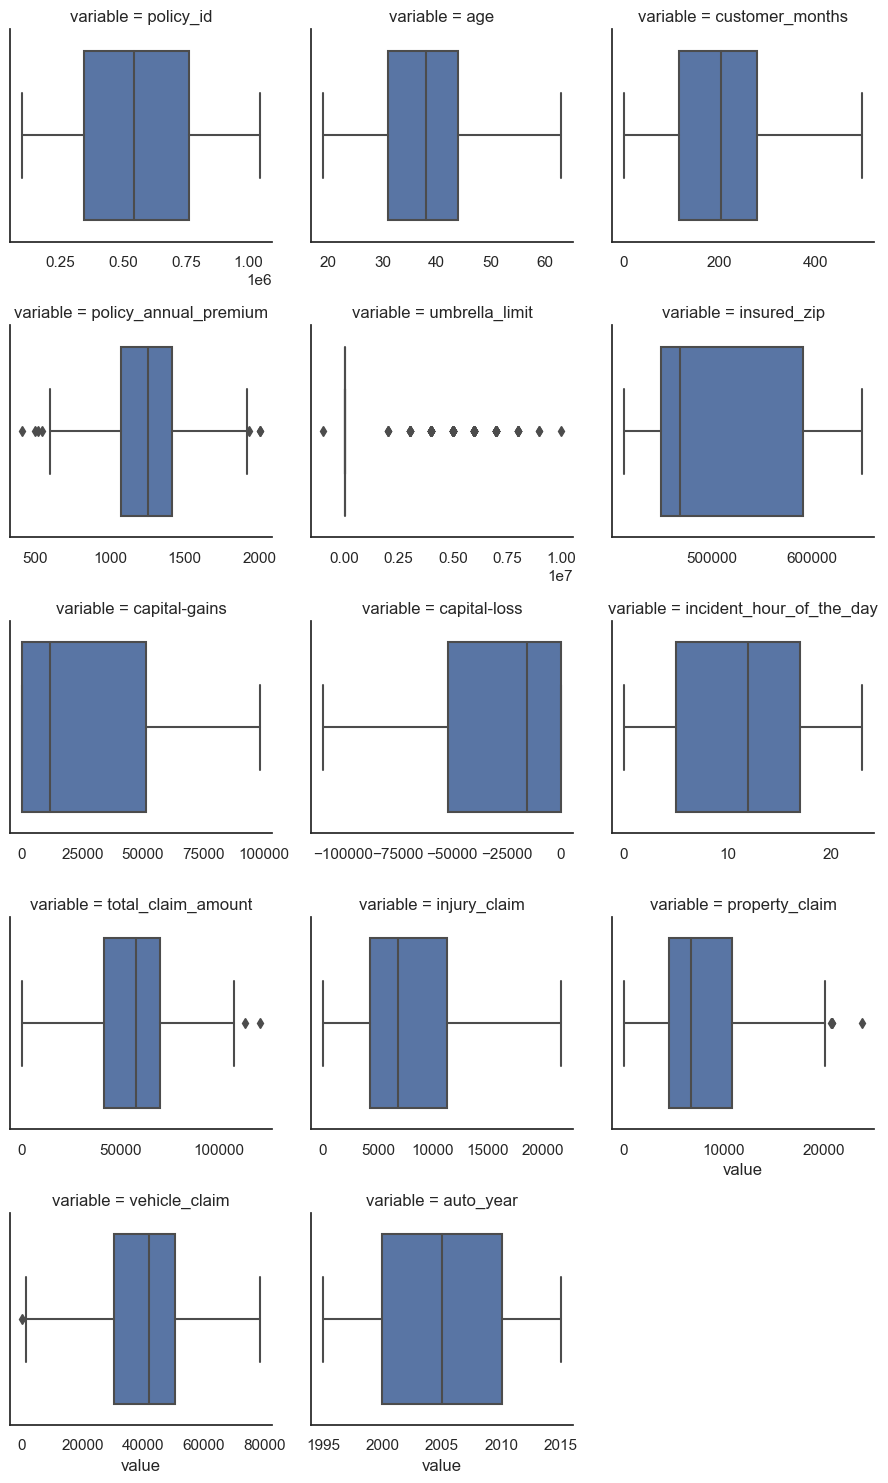

In [21]:
# Exceptions processing
f_box = sns.FacetGrid(serial_df, col="variable", col_wrap=3, sharex=False, sharey=False)
f_box.map(sns.boxplot, "value")

In [22]:
# Time series processing
datetime_list = ["policy_bind_date", "incident_date"]
financial_data[["policy_bind_date", "incident_date"]]
# 我们基于出险日期和保险绑定日期做一个差值，并取出出险日期作为单独的字段

,policy_bind_date,incident_date
0,2013-08-21,2014-12-22
1,1998-01-04,2015-02-18
2,1996-02-06,2015-01-18
3,2008-11-14,2015-02-02
4,2002-01-08,2015-02-09
...,...,...
695,1997-06-29,2015-01-18
696,2001-05-29,2015-01-13
697,2003-01-11,2015-03-05
698,2003-07-22,2015-01-09


In [23]:
import datetime

for val in datetime_list:
    train[val] = pd.to_datetime(train[val],format='%Y-%m-%d')
    test[val] = pd.to_datetime(test[val], format='%Y-%m-%d')

In [24]:
# 创建新特征，两个日期之差
train['detla_time'] = (train['incident_date'] - train['policy_bind_date']).dt.days
test['detla_time'] = (test['incident_date'] - test['policy_bind_date']).dt.days

<AxesSubplot: xlabel='detla_time', ylabel='Density'>

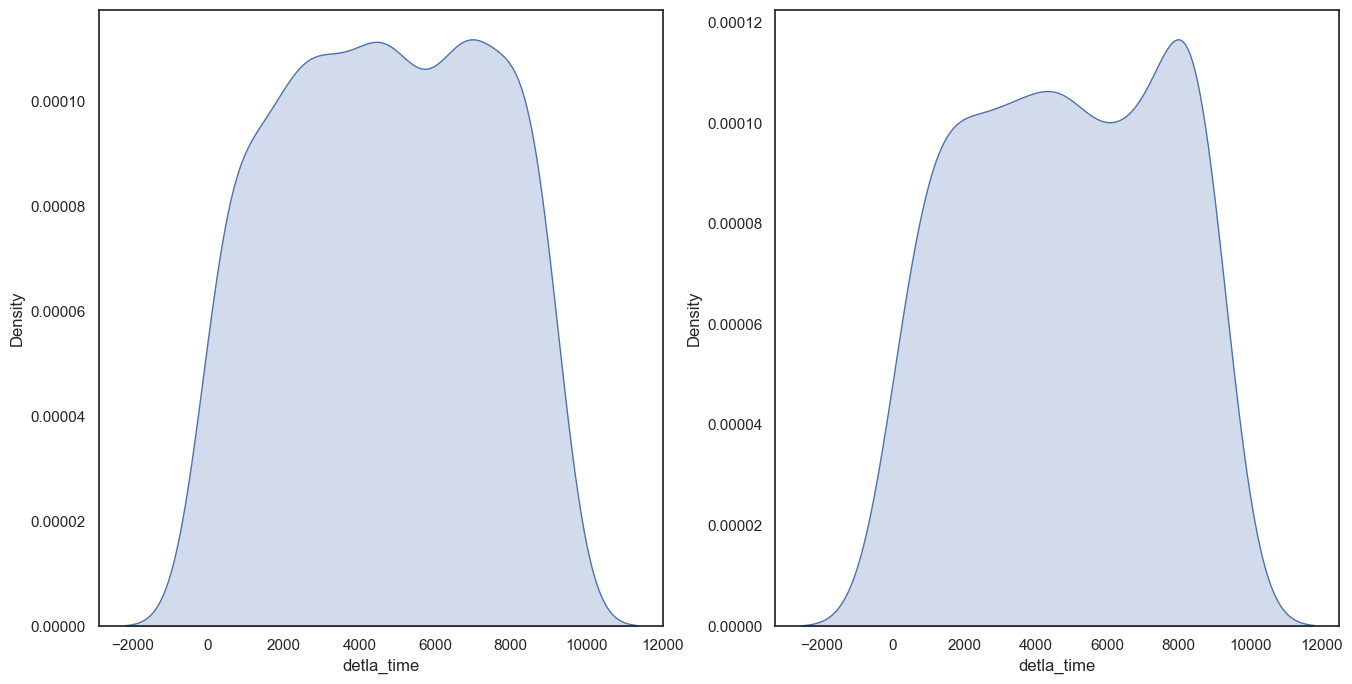

In [25]:
fig,axes = plt.subplots(1,2,figsize=(16,8))
sns.kdeplot(train['detla_time'],shade=True,ax=axes[0])
sns.kdeplot(test['detla_time'],shade=True,ax=axes[1])
# 分布良好

In [26]:
train['picked_month'] = train['incident_date'].dt.month
test['picked_month'] = test['incident_date'].dt.month
train['picked_month'] = train['picked_month'].apply(lambda x: str(x) + '月')
test['picked_month'] = test['picked_month'].apply(lambda x: str(x) + '月')
# 将数字处理成字符，因为我们不在意大小而在于出现的频次

In [27]:
train.drop(columns=['policy_bind_date','incident_date'],inplace=True)
test.drop(columns=['policy_bind_date','incident_date'],inplace=True)# 删除两个日期型feature

In [28]:
object_features.remove('policy_bind_date')
object_features.remove('incident_date')
object_features.append('picked_month')
numerical_features.append('detla_time')

In [29]:
# Feature Selection
train = train.drop(columns="policy_id")
test = test.drop(columns="policy_id")


In [30]:
train.corr()["fraud"].sort_values

<bound method Series.sort_values of age                           -0.001386
customer_months                0.005680
policy_deductable              0.051987
policy_annual_premium         -0.006739
umbrella_limit                 0.031321
insured_zip                    0.024838
capital-gains                 -0.041130
capital-loss                  -0.017276
incident_hour_of_the_day       0.014834
number_of_vehicles_involved    0.071055
bodily_injuries                0.024079
witnesses                      0.072243
total_claim_amount             0.155167
injury_claim                   0.082015
property_claim                 0.120906
vehicle_claim                  0.164941
auto_year                      0.019323
fraud                          1.000000
detla_time                     0.021705
Name: fraud, dtype: float64>

In [31]:
# Keep all features
# Show the features with corr higher than 0.6
def getHighRelatedFeatureDf(corr_matrix, corr_threshold):
    highRelatedFeatureDf = pd.DataFrame(corr_matrix[corr_matrix > corr_threshold].stack().reset_index())
    highRelatedFeatureDf.rename({'level_0':'feature1', 'level_1':'feature2', 0:'corr'}, axis=1, inplace=True)
    # Remove the variable corr with itself
    highRelatedFeatureDf = highRelatedFeatureDf[highRelatedFeatureDf.feature1 != highRelatedFeatureDf.feature2]
    # Connect feature1 and feature2 to remove deplicated
    highRelatedFeatureDf['feature_pair_key'] = highRelatedFeatureDf.loc[:, ['feature1', 'feature2']].apply(lambda r:"#".join(np.sort(r.values)), axis=1)
    highRelatedFeatureDf.drop_duplicates(subset=['feature_pair_key'], inplace=True)
    highRelatedFeatureDf.drop(columns='feature_pair_key', inplace=True)
    return highRelatedFeatureDf

In [32]:
getHighRelatedFeatureDf(train.corr(), 0.6)

,feature1,feature2,corr
1,age,customer_months,0.916035
15,total_claim_amount,injury_claim,0.800371
16,total_claim_amount,property_claim,0.800348
17,total_claim_amount,vehicle_claim,0.977623
20,injury_claim,vehicle_claim,0.712939
23,property_claim,vehicle_claim,0.720543


In [33]:
numerical_features.remove('age')
numerical_features.remove('injury_claim')
numerical_features.remove('policy_id')

In [34]:
# Feature encoding
y_label = train['fraud']
train = train.drop(columns='fraud')

In [35]:
train

,age,customer_months,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,detla_time,picked_month
0,37,189,C,500/1000,1000,1465.71,5000000,455456,FEMALE,Masters,...,?,54930,6029,5752,44452,Nissan,Maxima,2000,488,12月
1,44,234,B,250/500,500,821.24,0,591805,MALE,JD,...,YES,50680,5376,10156,37347,Honda,Civic,1996,6254,2月
2,33,23,B,500/1000,1000,1844.00,0,442490,FEMALE,High School,...,NO,47829,4460,9247,33644,Jeep,Wrangler,2002,6921,1月
3,42,210,A,500/1000,500,1867.29,0,439408,MALE,JD,...,YES,68862,11043,5955,53548,Suburu,Legacy,2003,2271,2月
4,29,81,A,100/300,1000,816.25,0,640575,FEMALE,MD,...,YES,59726,5617,10301,41550,Ford,F150,2004,4780,2月
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,37,196,C,250/500,500,1301.20,0,474615,MALE,JD,...,NO,61433,10436,11432,39745,Nissan,Pathfinder,2011,6412,1月
696,43,229,A,250/500,500,1434.94,8000000,444476,MALE,College,...,?,68623,6798,14557,50606,Volkswagen,Passat,2013,4977,1月
697,35,209,C,100/300,500,1639.46,0,639608,FEMALE,College,...,YES,58033,9129,4598,40740,Mercedes,C300,2002,4436,3月
698,44,275,B,500/1000,2000,1042.29,0,432061,FEMALE,Associate,...,NO,35253,7359,3464,24677,Audi,A3,2007,4189,1月


In [36]:
from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder()
for val in object_features:
    Label.fit(train[val])
    train[val] = Label.transform(train[val])
    test[val] = Label.transform(test[val])

In [37]:
train

,age,customer_months,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,detla_time,picked_month
0,37,189,2,2,1000,1465.71,5000000,455456,0,5,...,0,54930,6029,5752,44452,9,26,2000,488,0
1,44,234,1,1,500,821.24,0,591805,1,3,...,2,50680,5376,10156,37347,6,10,1996,6254,2
2,33,23,1,2,1000,1844.00,0,442490,0,2,...,1,47829,4460,9247,33644,7,36,2002,6921,1
3,42,210,0,2,500,1867.29,0,439408,1,3,...,2,68862,11043,5955,53548,11,21,2003,2271,2
4,29,81,0,0,1000,816.25,0,640575,0,4,...,2,59726,5617,10301,41550,5,14,2004,4780,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,37,196,2,1,500,1301.20,0,474615,1,3,...,1,61433,10436,11432,39745,9,29,2011,6412,1
696,43,229,0,1,500,1434.94,8000000,444476,1,1,...,0,68623,6798,14557,50606,13,28,2013,4977,1
697,35,209,2,0,500,1639.46,0,639608,0,1,...,2,58033,9129,4598,40740,8,7,2002,4436,3
698,44,275,1,2,2000,1042.29,0,432061,0,0,...,1,35253,7359,3464,24677,1,4,2007,4189,1


In [38]:
# Modeling
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, y_label, train_size=0.7)

In [41]:
# GBDT model
GBDT_params = {
    'loss': 'log_loss',
    'learning_rate': 0.1,
    'n_estimators': 30,
    'max_depth': 3,
    'min_sample_split': 300
}

GBDT_clf = GradientBoostingClassifier()

# Decision Tree model
tree_param = {
    'criterion': 'gini',
    'max_depth': 30,
    'min_impurity_decrease': 0.1,
    'min_samples_leaf': 2
    
}
Tree_clf = DecisionTreeClassifier(**tree_param) 

# XGBoost model 
xgboost_param = {
    'learning_rate':0.01,
    'reg_alpha':0.,
    'max_depth':3,
    'gamma':0,
    'min_child_weight':1
    
}
xgboost_clf = xgboost.XGBClassifier(**xgboost_param)

xgboost_clf.fit(X_train, y_train)
GBDT_clf.fit(X_train, y_train)
Tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_impurity_decrease=0.1,
                       min_samples_leaf=2)

In [42]:
# KFolds
K_model_list = [Tree_clf, GBDT_clf, xgboost_clf]
K_result = pd.DataFrame()
for i,val in enumerate(K_model_list):
    score = cross_validate(val,train,y_label,cv=6,scoring='accuracy')
    K_result.loc[i,'accuracy'] = score['test_score'].mean()
K_result.index = pd.Series(['Tree','GBDT','XGBoost'])
K_result

,accuracy
Tree,0.741428
GBDT,0.818560
XGBoost,0.829956


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

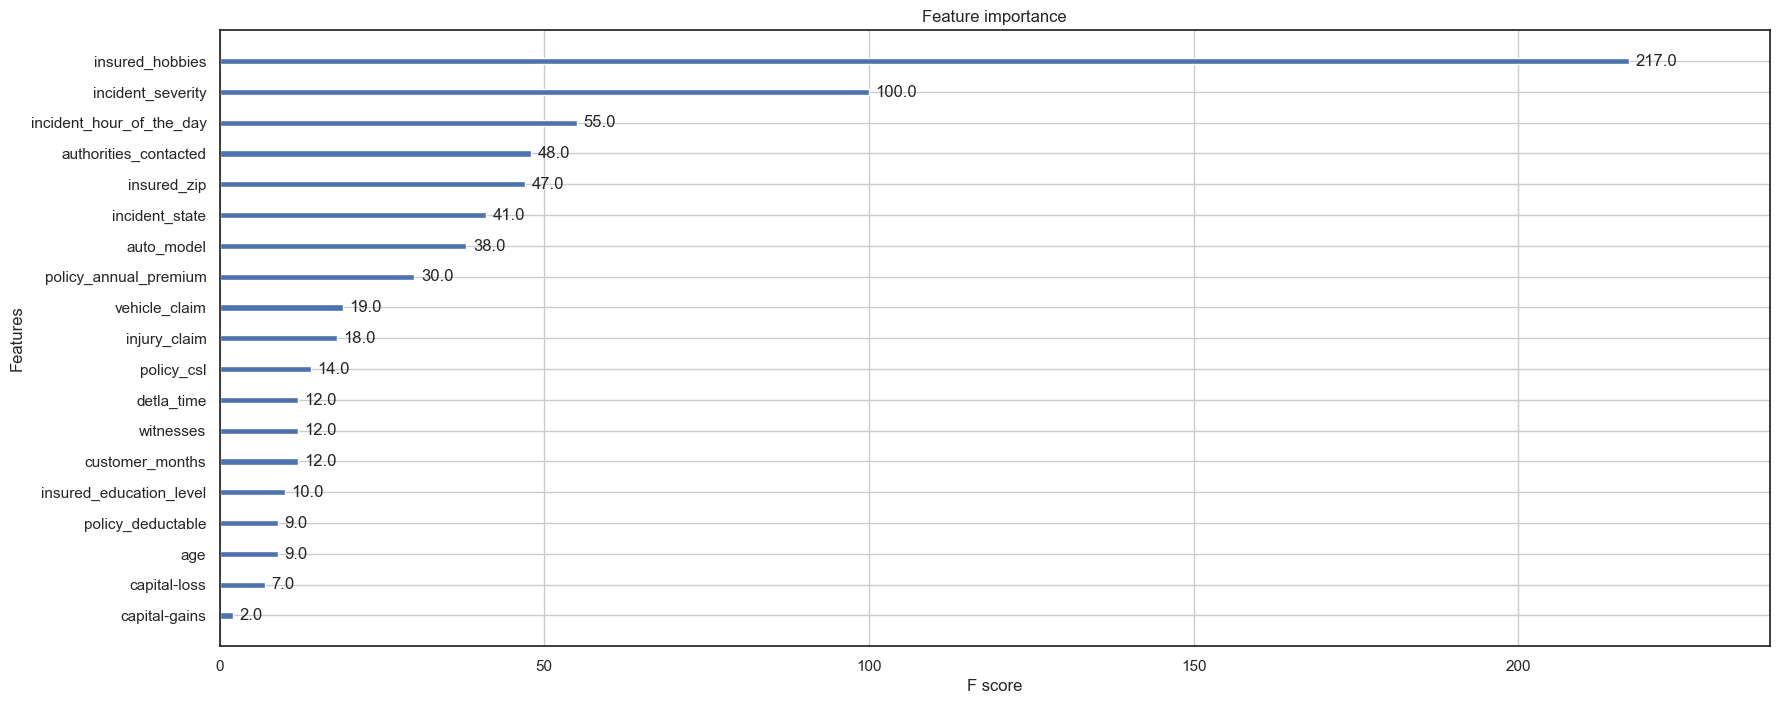

In [44]:
# Importance of Features
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(20, 8))
plot_importance(xgboost_clf, ax=ax)

In [47]:
sub_df = pd.read_csv("submission.csv")
sub_df['fraud'] = xgboost_clf.predict_proba(test)[:, 1]
sub_df.to_csv('result2.csv', index=False)